# **Telco Customers Churn Analysis and Predictive Models**

Khanh Tran

## 1. Research Objectives

1. Identifying the primary factors contributing to customer churn: This research aims to figure out the main factors that lead to consumers terminating the service by analyzing customer data and identifying trends. Being able to understand these characteristics facilitates the design of targeted interventions aimed at addressing the factors behind churn.
2. Investigating Feature Correlations and Customer Loyalty Tactics: Studying the correlation between different characteristics and turnover status will offer valuable insights into consumer behavior and preferences. The research will provide methods to boost client retention by concentrating on individualized products and enhanced service quality.
3. Create a dependable machine learning model for predicting customer churn. The project attempts to develop a prediction model using sophisticated machine learning techniques to reliably anticipate client attrition. The project aims to provide a strong tool for proactive churn control by evaluating different algorithms and enhancing model performance.

## 2. Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
data = pd.read_csv('../01.Data/telecom_customer_churn.csv')

# Display the first five rows to understand about dataset
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
# Shape of dataset
data.shape

(7043, 38)

In [4]:
# Create a brief summary data table
data_summary = pd.DataFrame({
    "Unique Values" : data.nunique(),
    "Missing Values": data.isnull().sum(),
    'NaN Values': data.isna().sum(),
    'Duplicated' : data.duplicated().sum(),
    'Dtypes': data.dtypes
})

data_summary.sort_values('Missing Values', ascending=False)

,Unique Values,Missing Values,NaN Values,Duplicated,Dtypes
Churn Reason,20,5174,5174,0,object
Churn Category,5,5174,5174,0,object
Internet Type,3,1526,1526,0,object
Unlimited Data,2,1526,1526,0,object
Streaming Music,2,1526,1526,0,object
Streaming Movies,2,1526,1526,0,object
Streaming TV,2,1526,1526,0,object
Premium Tech Support,2,1526,1526,0,object
Device Protection Plan,2,1526,1526,0,object
Online Security,2,1526,1526,0,object


In [5]:
# Summary statistics for numerical features
data.drop(columns=['Zip Code', 'Latitude', 'Longitude']).describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
# Summary statistics for key numerical features
data[['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Total Charges', 'Total Revenue']].describe()

,Age,Tenure in Months,Avg Monthly Long Distance Charges,Total Charges,Total Revenue
count,7043.000000,7043.000000,6361.000000,7043.000000,7043.000000
mean,46.509726,32.386767,25.420517,2280.381264,3034.379056
std,16.750352,24.542061,14.200374,2266.220462,2865.204542
min,19.000000,1.000000,1.010000,18.800000,21.360000
25%,32.000000,9.000000,13.050000,400.150000,605.610000
50%,46.000000,29.000000,25.690000,1394.550000,2108.640000
75%,60.000000,55.000000,37.680000,3786.600000,4801.145000
max,80.000000,72.000000,49.990000,8684.800000,11979.340000


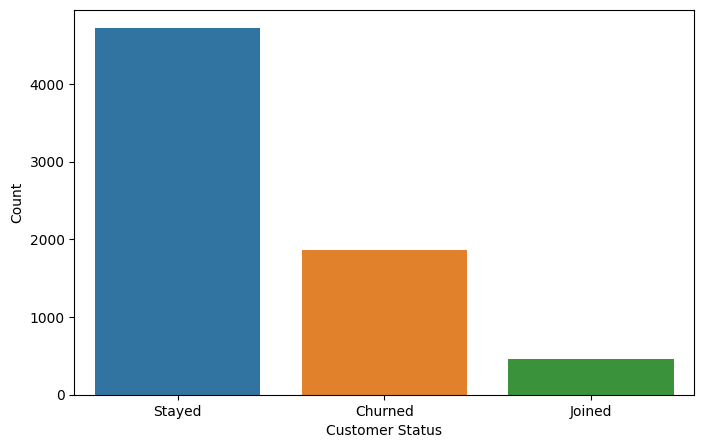

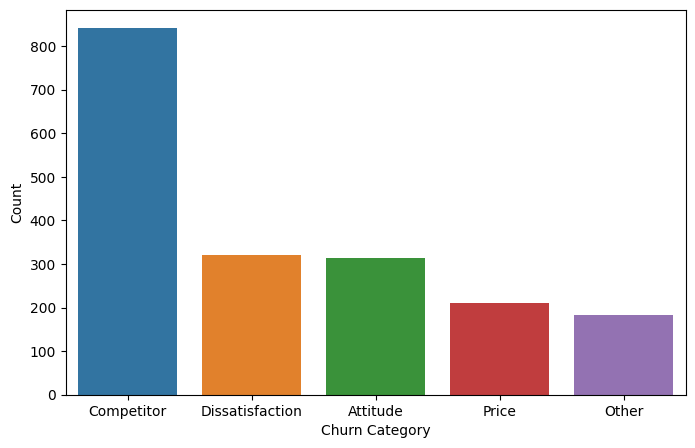

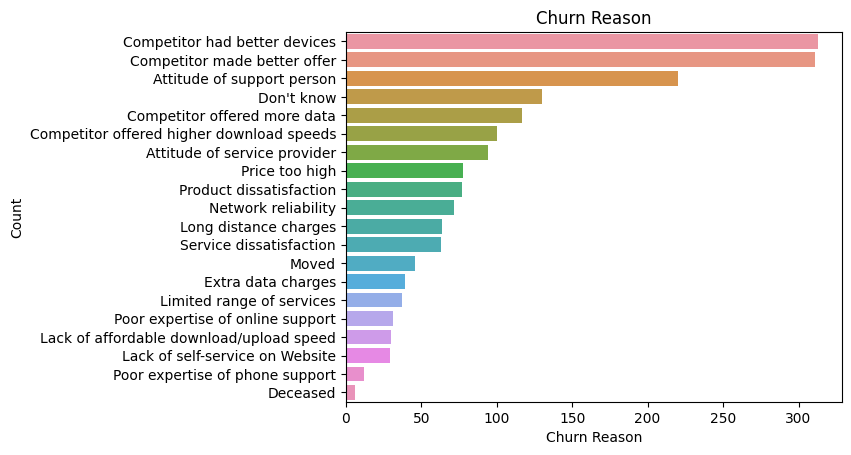

In [7]:
# # Setting the aesthetics for plots
# sns.set_theme(style="whitegrid")

# Visualizing the distribution of churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=data)
#plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Analyzing churn category
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn Category', data=data, order=data['Churn Category'].value_counts().index)
#plt.title('Churn Category Count')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Analyzing churn reason
sns.countplot(data=data, y='Churn Reason', order=data['Churn Reason'].value_counts().index)
plt.title('Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.show()

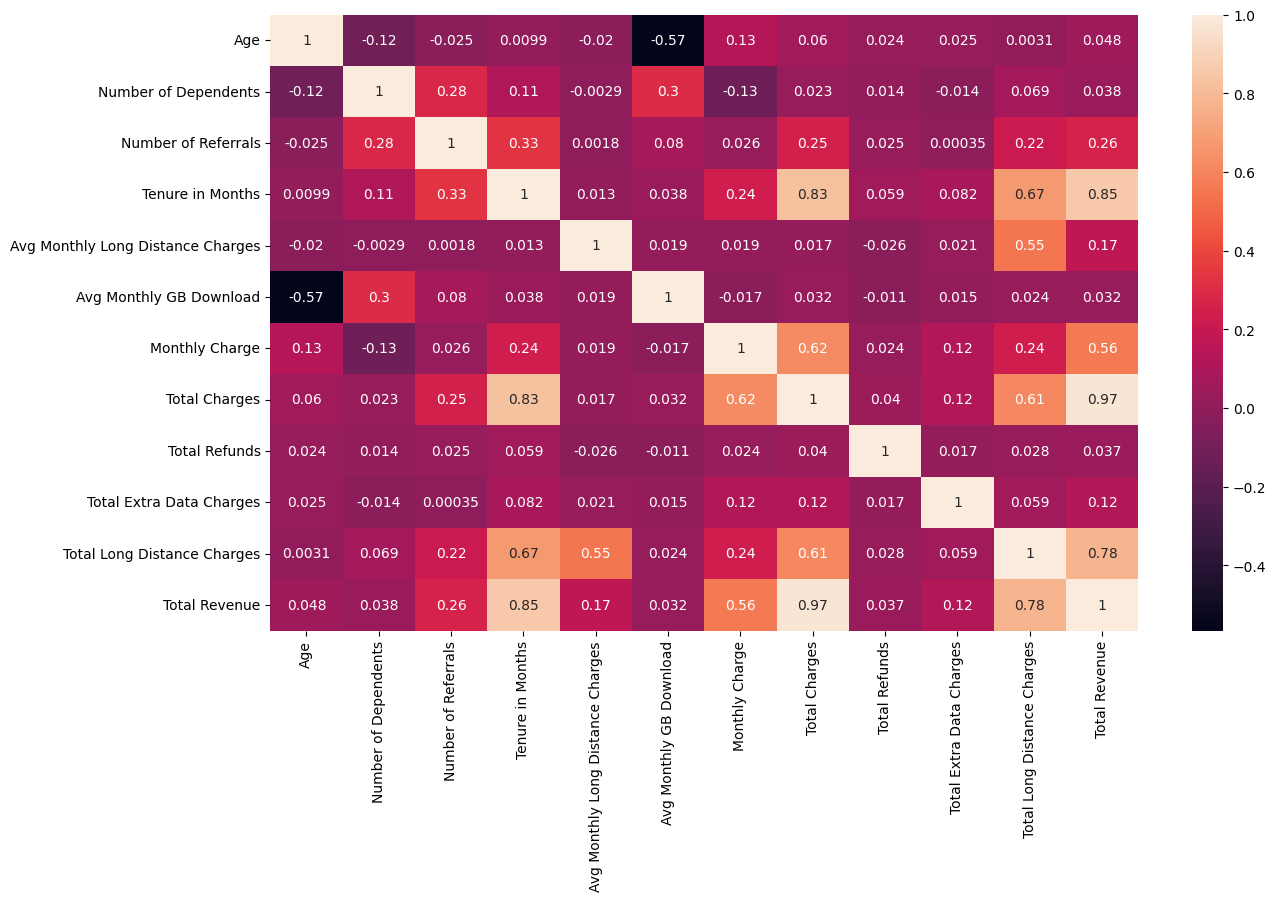

In [8]:
# Correlation among numeric variables
plt.figure(figsize=(14, 8))
sns.heatmap(data.drop(columns=['Zip Code','Latitude', 'Longitude']).select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

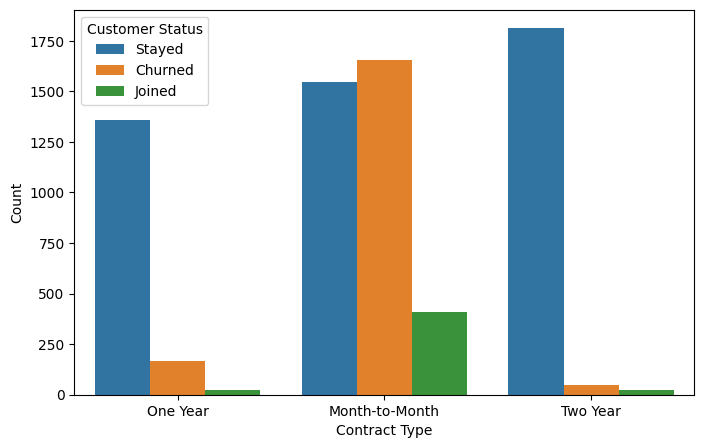

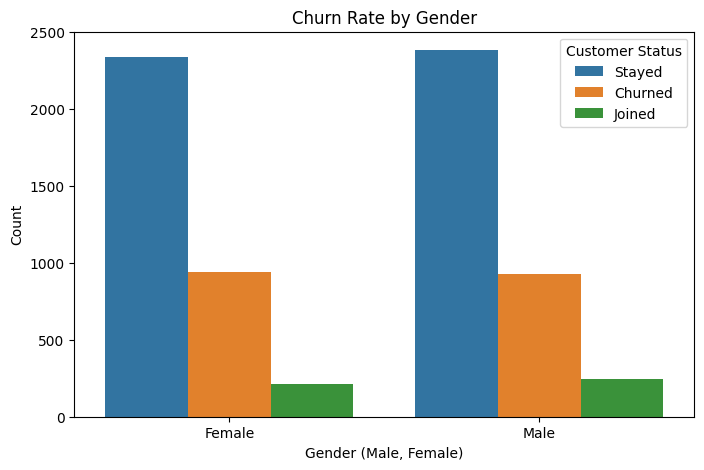

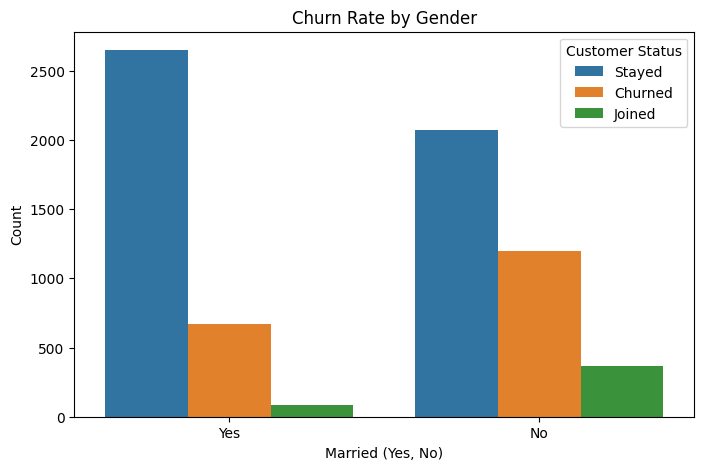

In [9]:
# Analyzing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=data)
#plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Married (Yes, No)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

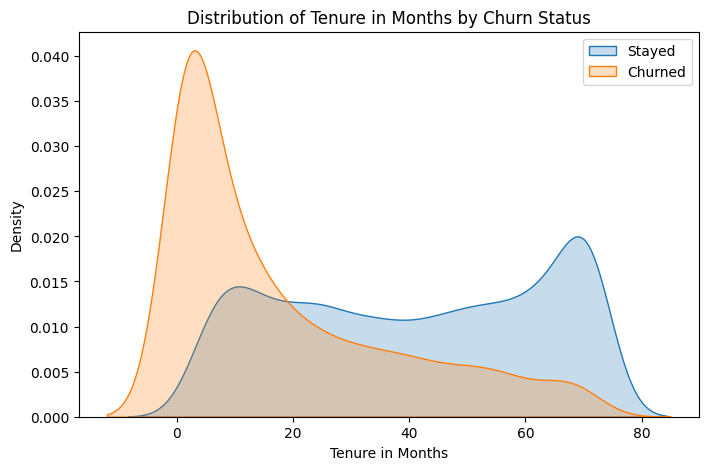

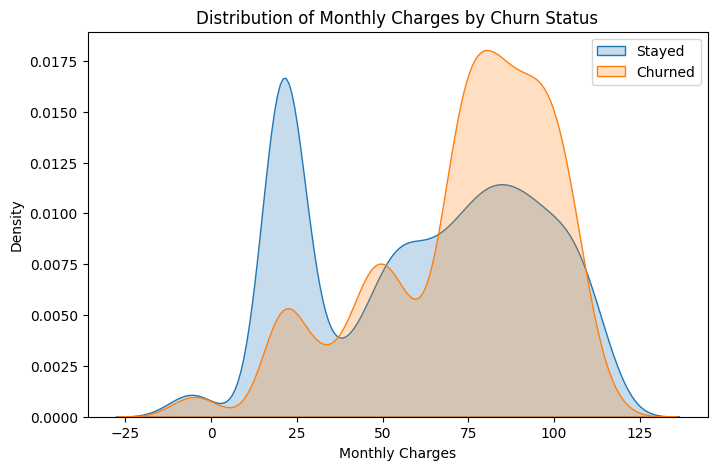

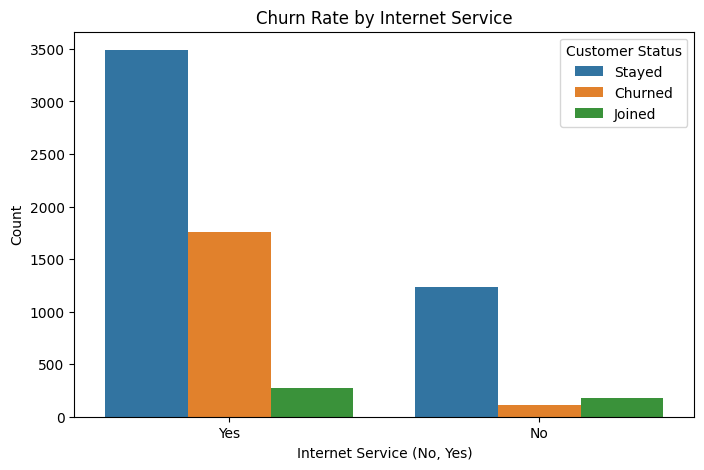

In [10]:
# Analyzing Tenure in Months vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Tenure in Months'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Tenure in Months'], label='Churned', fill=True)
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Monthly Charges vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Internet Service vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Service', hue='Customer Status', data=data)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service (No, Yes)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

## 3. Data Preparation

#### 4.1 Handle Missing Values

In [11]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Remove non-informative and directed churn indicator columns
data = data.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'])

# Fill missing values for categorical columns
categorical_fillna = {
    'Multiple Lines': 'No',
    'Internet Type': 'No',
    'Online Security': 'No',
    'Online Backup': 'No',
    'Device Protection Plan': 'No',
    'Premium Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Streaming Music': 'No',
    'Unlimited Data': 'No'
}

data.fillna(categorical_fillna, inplace=True)

# Since 'Avg Monthly Long Distance Charges' and 'Avg Monthly GB Download' can be zero for non-subscribers, fill with 0
data['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
data['Avg Monthly GB Download'].fillna(0, inplace=True)

# Check missing values count after preprocessing
data.isnull().sum().sum()

0

#### 4.2 Scaling Numerical Variables

In [12]:
# Apply min-max scaling to numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns  # Get numerical columns
numerical_columns = [col for col in numerical_columns] # Create a list of numerical columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(data[numerical_columns])

# Create a DataFrame with the scaled numerical data
scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in numerical_columns])

# Concatenate the original DataFrame with the scaled numerical columns then drop original numerical columns
data = pd.concat([data, scaled_df], axis=1).drop(columns=numerical_columns) 

# Display top 5 rows
data.head()

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,...,Number of Referrals_scaled,Tenure in Months_scaled,Avg Monthly Long Distance Charges_scaled,Avg Monthly GB Download_scaled,Monthly Charge_scaled,Total Charges_scaled,Total Refunds_scaled,Total Extra Data Charges_scaled,Total Long Distance Charges_scaled,Total Revenue_scaled
0,Female,Yes,None,Yes,No,Yes,Cable,No,Yes,No,...,0.181818,0.112676,0.847970,0.188235,0.587184,0.066294,0.000000,0.000000,0.107024,0.079733
1,Male,No,None,Yes,Yes,Yes,Cable,No,No,No,...,0.000000,0.112676,0.213843,0.117647,0.046602,0.060420,0.769833,0.066667,0.026989,0.049249
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,...,0.000000,0.042254,0.673135,0.352941,0.651650,0.030239,0.000000,0.000000,0.037759,0.032956
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,...,0.090909,0.169014,0.556511,0.047059,0.838835,0.140670,0.000000,0.000000,0.101455,0.131975
4,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,...,0.272727,0.028169,0.147630,0.129412,0.729320,0.028687,0.000000,0.000000,0.006211,0.022427


#### 4.3 Encoding Categorical Variables

In [13]:
# Encoding binary categorical variables
binary_columns = ['Gender', 'Married', 'Phone Service', 'Paperless Billing']
binary_mapping = {'Female': 1, 'Male': 0, 'Yes': 1, 'No': 0}

for column in binary_columns:
    if data[column].dtype == 'object':  # Only apply if the column is categorical
        data[column] = data[column].map(binary_mapping)
        
        
# One hot encoding for remaining categorical variables
ohe = OneHotEncoder(sparse_output=False)
categorical_columns = data.select_dtypes(include=['object']).columns.drop('Customer Status')
categorical_columns = [column for column in categorical_columns]

# Apply one hot encoding and concatenate with the original data
for column in categorical_columns:
    # Perform one-hot encoding on the column
    encoded = ohe.fit_transform(data[[column]])
    # Create a DataFrame with the encoded variables
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{cat}" for cat in ohe.categories_[0]])
    # Drop the original column from data
    data.drop(column, axis=1, inplace=True)
    # Concatenate the original data with the encoded DataFrame
    data = pd.concat([data, encoded_df], axis=1)        

In [14]:
# Replace spaces in column names by "_"
data.columns = data.columns.str.replace(' ', '_')
data.columns    

Index(['Gender', 'Married', 'Phone_Service', 'Paperless_Billing',
       'Customer_Status', 'Age_scaled', 'Number_of_Dependents_scaled',
       'Number_of_Referrals_scaled', 'Tenure_in_Months_scaled',
       'Avg_Monthly_Long_Distance_Charges_scaled',
       'Avg_Monthly_GB_Download_scaled', 'Monthly_Charge_scaled',
       'Total_Charges_scaled', 'Total_Refunds_scaled',
       'Total_Extra_Data_Charges_scaled', 'Total_Long_Distance_Charges_scaled',
       'Total_Revenue_scaled', 'Offer_None', 'Offer_Offer_A', 'Offer_Offer_B',
       'Offer_Offer_C', 'Offer_Offer_D', 'Offer_Offer_E', 'Multiple_Lines_No',
       'Multiple_Lines_Yes', 'Internet_Service_No', 'Internet_Service_Yes',
       'Internet_Type_Cable', 'Internet_Type_DSL', 'Internet_Type_Fiber_Optic',
       'Internet_Type_No', 'Online_Security_No', 'Online_Security_Yes',
       'Online_Backup_No', 'Online_Backup_Yes', 'Device_Protection_Plan_No',
       'Device_Protection_Plan_Yes', 'Premium_Tech_Support_No',
       'Premium_Tech

In [15]:
# Since we focus on Churn prediction, I remove Joined status
data = data[data['Customer_Status'] != 'Joined']

# Map Customer Status
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Save processed data
data.to_csv('../01.Data/telecom_customer_churn_processed.csv')

In [16]:
data.head()

,Gender,Married,Phone_Service,Paperless_Billing,Customer_Status,Age_scaled,Number_of_Dependents_scaled,Number_of_Referrals_scaled,Tenure_in_Months_scaled,Avg_Monthly_Long_Distance_Charges_scaled,...,Streaming_Music_No,Streaming_Music_Yes,Unlimited_Data_No,Unlimited_Data_Yes,Contract_Month-to-Month,Contract_One_Year,Contract_Two_Year,Payment_Method_Bank_Withdrawal,Payment_Method_Credit_Card,Payment_Method_Mailed_Check
0,1,1,1,1,0,0.295082,0.0,0.181818,0.112676,0.847970,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,1,0,0,0.442623,0.0,0.000000,0.112676,0.213843,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,1,1,0.508197,0.0,0.000000,0.042254,0.673135,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,1,1,1,1,0.967213,0.0,0.090909,0.169014,0.556511,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,1,1,1,1,0.918033,0.0,0.272727,0.028169,0.147630,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


#### 4.3 Preparing the dataset for modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using 'Customer Status' as the target variable
X = data.drop(columns=['Customer_Status'])
y = data['Customer_Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4941, 52), (1648, 52), (4941,), (1648,))

In [18]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=6910)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote.shape, y_train_smote.shape

((7078, 52), (7078,))

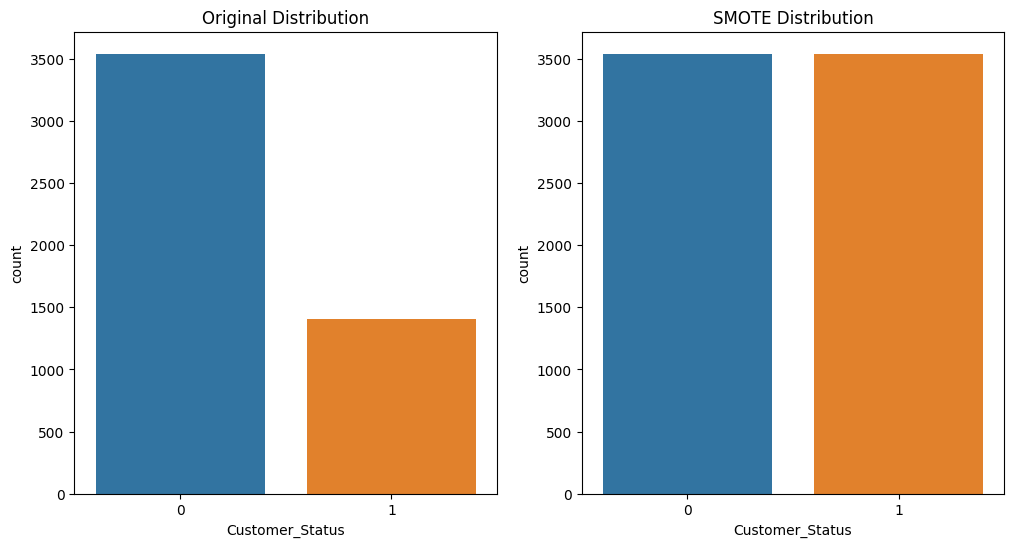

In [19]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot the original class distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Original Distribution')

# Plot the class distribution after apply SMOTE 
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('SMOTE Distribution')

plt.show()

## 4. Predictive Modelling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=6910),
    "SVC": SVC(random_state=6910),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=6910),
    "Random Forest": RandomForestClassifier(random_state=6910),
    "Gradient Boosting": GradientBoostingClassifier(random_state=6910),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=6910),
    "Bagging Classifier": BaggingClassifier(random_state=6910),
    "MLP Classifier": MLPClassifier(random_state=6910),
    "xgboost": XGBClassifier(random_state=6910),
    "lightgbm": LGBMClassifier(random_state=6910, verbose=-1)
    }

## 5. Models Evaluation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Number of splits for cross-validation
n_splits = 5

# Stratified k-Fold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=6910)

# Dictionary to hold cross-validation scores
cv_scores = {name: {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []} for name in models.keys()}

# Cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    for name, model in models.items():
        # # Create a pipeline with scaling and model
        # pipeline = make_pipeline(StandardScaler(), model)
        
        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        precision = precision_score(y_val_fold, y_val_pred)
        recall = recall_score(y_val_fold, y_val_pred)
        f1 = f1_score(y_val_fold, y_val_pred)
        
        # Store the scores
        cv_scores[name]["Accuracy"].append(accuracy)
        cv_scores[name]["Precision"].append(precision)
        cv_scores[name]["Recall"].append(recall)
        cv_scores[name]["F1 Score"].append(f1)

# Calculate the average scores from cross-validation
for name in cv_scores.keys():
    for metric in cv_scores[name].keys():
        cv_scores[name][metric] = sum(cv_scores[name][metric]) / n_splits

# Display cross-validation scores
cv_scores_df = pd.DataFrame(cv_scores).T
print("Cross-validation Scores:")
print(round(cv_scores_df, 2).sort_values('F1 Score', ascending=False))


### Now, train the models on the entire training set and evaluate on the test set
model_scores = {}

for name, model in models.items():
    # # Create a pipeline with scaling and model
    # pipeline = make_pipeline(StandardScaler(), model)
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Display test set scores
model_scores_df = pd.DataFrame(model_scores).T
print("\nTest Set Scores:")
print(round(model_scores_df, 2).sort_values('F1 Score', ascending=False))


Cross-validation Scores:
                       Accuracy  Precision  Recall  F1 Score
Gradient Boosting          0.87       0.82    0.71      0.76
lightgbm                   0.87       0.80    0.71      0.76
AdaBoost Classifier        0.86       0.77    0.72      0.74
xgboost                    0.86       0.79    0.70      0.74
Logistic Regression        0.85       0.74    0.71      0.73
Random Forest              0.86       0.82    0.66      0.73
Bagging Classifier         0.85       0.80    0.63      0.71
MLP Classifier             0.84       0.73    0.69      0.71
SVC                        0.84       0.74    0.66      0.70
GaussianNB                 0.80       0.62    0.79      0.69
Decision Tree              0.82       0.67    0.68      0.68
KNeighbors Classifier      0.80       0.64    0.65      0.64

Test Set Scores:
                       Accuracy  Precision  Recall  F1 Score
Gradient Boosting          0.89       0.83    0.76      0.79
lightgbm                   0.88       0.82

In [22]:
### Apply SMOTE on training dataset

# Dictionary to hold cross-validation scores for SMOTE
cv_scores_smote = {name: {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []} for name in models.keys()}
# Cross-validation
for train_index, val_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]
    
    for name, model in models.items():
        # # Create a pipeline with scaling and model
        # pipeline = make_pipeline(StandardScaler(), model)
        
        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        precision = precision_score(y_val_fold, y_val_pred)
        recall = recall_score(y_val_fold, y_val_pred)
        f1 = f1_score(y_val_fold, y_val_pred)
        
        # Store the scores
        cv_scores_smote[name]["Accuracy"].append(accuracy)
        cv_scores_smote[name]["Precision"].append(precision)
        cv_scores_smote[name]["Recall"].append(recall)
        cv_scores_smote[name]["F1 Score"].append(f1)

# Calculate the average scores from cross-validation
for name in cv_scores_smote.keys():
    for metric in cv_scores_smote[name].keys():
        cv_scores_smote[name][metric] = sum(cv_scores_smote[name][metric]) / n_splits

# Display cross-validation scores
cv_scores_smote_df = pd.DataFrame(cv_scores_smote).T
print("Cross-validation Scores:")
print(round(cv_scores_smote_df, 2).sort_values('F1 Score', ascending=False))



### Now, train the models on the entire training set and evaluate on the test set
model_scores = {}

for name, model in models.items():
    # # Create a pipeline with scaling and model
    # pipeline = make_pipeline(StandardScaler(), model)
    
    # Fit the model on the entire training set
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Display test set scores
model_scores_df = pd.DataFrame(model_scores).T
print("\nTest Set Scores:")
print(round(model_scores_df, 2).sort_values('F1 Score', ascending=False))


Cross-validation Scores:
                       Accuracy  Precision  Recall  F1 Score
Random Forest              0.90       0.89    0.91      0.90
xgboost                    0.90       0.90    0.90      0.90
lightgbm                   0.90       0.90    0.90      0.90
Gradient Boosting          0.89       0.88    0.90      0.89
AdaBoost Classifier        0.88       0.86    0.89      0.88
Bagging Classifier         0.88       0.90    0.87      0.88
MLP Classifier             0.87       0.86    0.90      0.88
SVC                        0.86       0.84    0.90      0.87
Decision Tree              0.85       0.85    0.87      0.86
Logistic Regression        0.84       0.82    0.88      0.85
KNeighbors Classifier      0.82       0.76    0.93      0.84
GaussianNB                 0.82       0.82    0.83      0.82

Test Set Scores:
                       Accuracy  Precision  Recall  F1 Score
lightgbm                   0.88       0.78    0.80      0.79
Gradient Boosting          0.87       0.73

#### Hyperparameters top 3 algorithms

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lgbm = LGBMClassifier(verbose=-1)
adaboost = AdaBoostClassifier()
gbm = GradientBoostingClassifier()

# LightGBM parameters
lgbm_params = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': [31, 50, 70, 90],
    'max_depth': [-1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample_for_bin': [200000, 220000, 240000, 260000],
    'objective': ['binary'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': [0.0, 0.1, 0.2, 0.3],
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.8, 0.9, 1.0],
    'subsample_freq': [0, 1, 2, 3],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'importance_type': ['split', 'gain']
}

# AdaBoost parameters
adaboost_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Gradient Boosting parameters
gbm_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_impurity_decrease': [0, 0.01, 0.02, 0.05]
}

In [24]:
# # LightGBM GridSearchCV
# lgbm_grid = GridSearchCV(lgbm, lgbm_params, scoring='f1', cv=skf)
# lgbm_grid.fit(X_train, y_train)

# # AdaBoost GridSearchCV
# adaboost_grid = GridSearchCV(adaboost, adaboost_params, scoring='f1', cv=skf)
# adaboost_grid.fit(X_train, y_train)

# # Gradient Boosting GridSearchCV
# gbm_grid = GridSearchCV(gbm, gbm_params, scoring='f1', cv=skf)
# gbm_grid.fit(X_train, y_train)

In [25]:
# LightGBM RandomizedSearchCV
lgbm_random = RandomizedSearchCV(lgbm, lgbm_params, scoring='f1', cv=skf, n_iter=50, random_state=6910)
lgbm_random.fit(X_train, y_train)

# AdaBoost RandomizedSearchCV
adaboost_random = RandomizedSearchCV(adaboost, adaboost_params, scoring='f1', cv=skf, n_iter=50, random_state=6910)
adaboost_random.fit(X_train, y_train)

# Gradient Boosting RandomizedSearchCV
gbm_random = RandomizedSearchCV(gbm, gbm_params, scoring='f1', cv=skf, n_iter=50, random_state=6910)
gbm_random.fit(X_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=6910, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_impurity_decrease': [0, 0.01, 0.02,
                                                                  0.05],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'min_weight_fraction_leaf': [0, 0.1,
                                                                     0.2],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=6910, scoring='f1')

In [26]:
# print("Best parameters for LightGBM:", lgbm_grid.best_params_)
# print("Best parameters for AdaBoost:", adaboost_grid.best_params_)
# print("Best parameters for Gradient Boosting:", gbm_grid.best_params_)

print("Best parameters for LightGBM (Randomized):", lgbm_random.best_params_)
print("Best parameters for AdaBoost (Randomized):", adaboost_random.best_params_)
print("Best parameters for Gradient Boosting (Randomized):", gbm_random.best_params_)


Best parameters for LightGBM (Randomized): {'subsample_freq': 0, 'subsample_for_bin': 260000, 'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'objective': 'binary', 'num_leaves': 70, 'n_estimators': 200, 'min_split_gain': 0.0, 'min_child_weight': 0.001, 'min_child_samples': 40, 'max_depth': -1, 'learning_rate': 0.01, 'importance_type': 'split', 'colsample_bytree': 0.8, 'class_weight': 'balanced', 'boosting_type': 'gbdt'}
Best parameters for AdaBoost (Randomized): {'n_estimators': 300, 'learning_rate': 1.0, 'algorithm': 'SAMME'}
Best parameters for Gradient Boosting (Randomized): {'subsample': 1.0, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 6, 'min_impurity_decrease': 0, 'max_depth': 9, 'loss': 'log_loss', 'learning_rate': 0.05, 'criterion': 'squared_error'}


In [27]:
# print("Best Score for LightGBM:", lgbm_grid.best_score_)
# print("Best Score for AdaBoost:", adaboost_grid.best_score_)
# print("Best Score for Gradient Boosting:", gbm_grid.best_score_)

print("Best Score for LightGBM (Randomized):", lgbm_random.best_score_)
print("Best Score for AdaBoost (Randomized):", adaboost_random.best_score_)
print("Best Score for Gradient Boosting (Randomized):", gbm_random.best_score_)

Best Score for LightGBM (Randomized): 0.7582770598112772
Best Score for AdaBoost (Randomized): 0.7522766938795252
Best Score for Gradient Boosting (Randomized): 0.7576987750161294


In [28]:
# Retrain the classifiers with the best parameters
best_gb_model = GradientBoostingClassifier(**gbm_random.best_params_, random_state=6910)
best_ada_model = AdaBoostClassifier(**adaboost_random.best_params_, random_state=6910)
best_lgbm_model = LGBMClassifier(**lgbm_random.best_params_, random_state=6910, verbose=-1)

best_gb_model.fit(X_train, y_train)
best_ada_model.fit(X_train, y_train)
best_lgbm_model.fit(X_train, y_train)

# Evaluate the retrained models on the test set
from sklearn.metrics import accuracy_score

y_pred_gb = best_gb_model.predict(X_test)
y_pred_ada = best_ada_model.predict(X_test)
y_pred_lgbm = best_lgbm_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

print("Accuracy of Gradient Boosting:", accuracy_gb)
print("Accuracy of AdaBoost:", accuracy_ada)
print("Accuracy of LightGBM:", accuracy_lgbm)

f1_score_gb = f1_score(y_test, y_pred_gb)
f1_score_ada = f1_score(y_test, y_pred_ada)
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)

print("F1 Score of Gradient Boosting:", f1_score_gb)
print("F1 Score of AdaBoost:", f1_score_ada)
print("F1 Score of LightGBM:", f1_score_lgbm)

Accuracy of Gradient Boosting: 0.875
Accuracy of AdaBoost: 0.8768203883495146
Accuracy of LightGBM: 0.8634708737864077


In [29]:
f1_score_gb = f1_score(y_test, y_pred_gb)
f1_score_ada = f1_score(y_test, y_pred_ada)
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)

print("F1 Score of Gradient Boosting:", f1_score_gb)
print("F1 Score of AdaBoost:", f1_score_ada)
print("F1 Score of LightGBM:", f1_score_lgbm)

F1 Score of Gradient Boosting: 0.7721238938053097
F1 Score of AdaBoost: 0.7766776677667766
F1 Score of LightGBM: 0.7809152872444012


## 6. Model Deployment

In [30]:
# Save the final model to pickle file
import pickle

filename = 'churn_prediction_ada.pkl'
pickle.dump(best_ada_model, open(filename, 'wb'))

In [31]:
# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Connect to the Azure workspace
ws = Workspace.from_config()

### Voting Ensembling

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


clf1 = LogisticRegression(random_state=6910)
clf3 = SVC(probability=True, random_state=6910)
clf5 = KNeighborsClassifier()
clf6 = GaussianNB()
clf7 = DecisionTreeClassifier(random_state=6910)
clf8 = RandomForestClassifier(random_state=6910)
clf9 = GradientBoostingClassifier(random_state=6910)
clf10 = AdaBoostClassifier(random_state=6910)
clf11 = BaggingClassifier(random_state=6910)
clf12 = MLPClassifier(mrandom_state=6910)


eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('svc', clf3), ('knn', clf5), ('gnb', clf6), ('dt', clf7), ('rf', clf8), ('gb',clf9), ('ada', clf10), ('bag', clf11), ('mlp', clf12)],
                         voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred1 = eclf1.predict(X_test)

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('svc', clf3), ('knn', clf5), ('gnb', clf6), ('dt', clf7), ('rf', clf8), ('gb',clf9), ('ada', clf10), ('bag', clf11), ('mlp', clf12)],
        voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred2 = eclf2.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score, classification_report

y_pred1 = eclf1.predict(X_test)
y_pred2 = eclf2.predict(X_test)

print(classification_report(y_test,y_pred1))
print(classification_report(y_test,y_pred2))

In [ ]:
from sklearn.model_selection import GridSearchCV


# Set up the VotingClassifier with soft voting
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft')

# Define parameter grid to search for optimal weights
params = {'weights': [[i, j, k] for i in np.arange(0, 1.1, 0.1)
                      for j in np.arange(0, 1.1, 0.1)
                      for k in np.arange(0, 1.1, 0.1)]}

# Set up GridSearchCV to find the optimal weights
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best parameters
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid.best_params_)
print("Best score: ", grid.best_score_)
